# Model evaluation

In [1]:
import pickle
file = open('X_test', 'rb')

# dump information to that file
X_test = pickle.load(file)

# close the file
file.close()

In [2]:
import pickle
file = open('y_test', 'rb')

# dump information to that file
y_test = pickle.load(file)

# close the file
file.close()

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

## Color change

In [4]:
X_test[3].shape

(256, 256)

In [5]:
X_test=np.stack([X_test]*3, axis=-1)

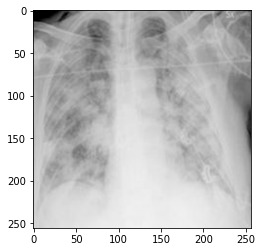

In [6]:
plt.imshow(X_test[3])

In [7]:
X_test.shape

(1167, 256, 256, 3)

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input

X_test=tf.keras.applications.vgg16.preprocess_input(
    X_test, data_format=None
)

## Evaluate Model

In [9]:
from tensorflow.keras import models
loaded_model = models.load_model('/Users/davidmedioni/code/dino120798/finalproject/models')

In [10]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               16384500  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2004      
Total params: 31,101,192
Trainable params: 31,101,192
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_test[:3].shape

In [ ]:
y_test[3].shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


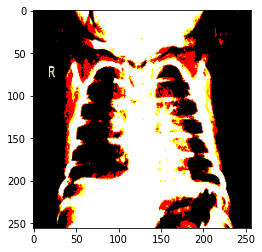

In [11]:
plt.imshow(X_test[10])

In [12]:
from tensorflow.keras.backend import expand_dims

In [13]:
X_test_expe= expand_dims(X_test[10], axis=0)

In [14]:
X_test_expe.shape

TensorShape([1, 256, 256, 3])

In [15]:
loaded_model.predict(X_test_expe, verbose=1)

1/1 [==============================] - 1s 631ms/step


array([[5.1933392e-03, 7.2368682e-15, 9.9319261e-01, 1.6140767e-03]],
      dtype=float32)

## Scores

In [ ]:
y_true = y_test

In [ ]:
y_pred = loaded_model.predict(y_true)

In [ ]:
number_list = y_pred

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [ ]:
number_list = y_true

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_true,y_pred)

In [ ]:
labels = [‘bacterial_pneumonia’, ‘covid-19’, ‘normal’, ‘viral_pneumonia’]

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

In [ ]:
sns.heatmap(df_cm, annot=True)

In [ ]:
target_names =['bacterial_pneumonia', 'covid-19', 'normal', 'viral_pneumonia']
print(classification_report(y_true, y_pred, target_names=target_names))